현재 진행 중인 Kaggle과제에 대한

제안서 및 진척도를 발표합니다.

-날짜: 11/24/2022

-내용

=제안서 내용 및 역할 분담

=현재 진척도

=Kaggle데이터 셋은 기존에 분석된 사례가 많으므로 그대로 정리하는 것도 좋습니다.

  단, 우리 팀만의 특이점, 주요요소(기존 Kaggle 분석과 차별화된 것)를 제안서에 추가해 주십시오.(발표 시 보임)

  기존 제안서에 없었다면 추가해 주세요.

=데이터셋을 통해 얻고자 하는 것....등

# Flight Price Prediction
## INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Research Questions
The aim of our study is to answer the below research questions:
a) 항공사에 따른 가격차이 
b) 표 구매시기가 가격에 영향을 미치는지?
c) 은행 시간에 따라 가격이 달라지는지?
d) 출발지와 목적지가 가격에 영향을 미치는지?
e) 이코노미석과 비즈니스석 가격이 얼마나 다른지?

## DATA COLLECTION AND METHODOLOGY
Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

## DATASET
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

## FEATURES
The various features of the cleaned dataset are explained below:  
1) Airline: 항공사 이름, 6개 레이블   
2) Flight: 비행기코드  
3) Source City:출발(이륙) 도시, 6개 레이블  
4) Departure Time:  기간을 빈으로 그룹화하, 출발 시간, 6개 레이블  
5) Stops: 경유 도시, 3개 레이블  
6) Arrival Time: 도착시간, 기간 빈으로 그룹화,6개 레이블    
7) Destination City: 도착지, 6개 레이블   
8) Class: 좌석 클래스, 이코노미 & 비즈니스  
9) Duration: 도시 간 이동에 걸리는 전체 시간을 시간 단위로 표시  
10) Days Left: 여행날짜를 예약날짜에 뺌  
11) Price: 티켓 가격    

# Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [2]:
df=pd.read_csv("Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [7]:
df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [8]:
df["departure_time"].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [9]:
df["arrival_time"].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [10]:
df=df.drop(columns=["Unnamed: 0"])

In [11]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Visualization

(0.0, 1.0, 0.0, 1.0)

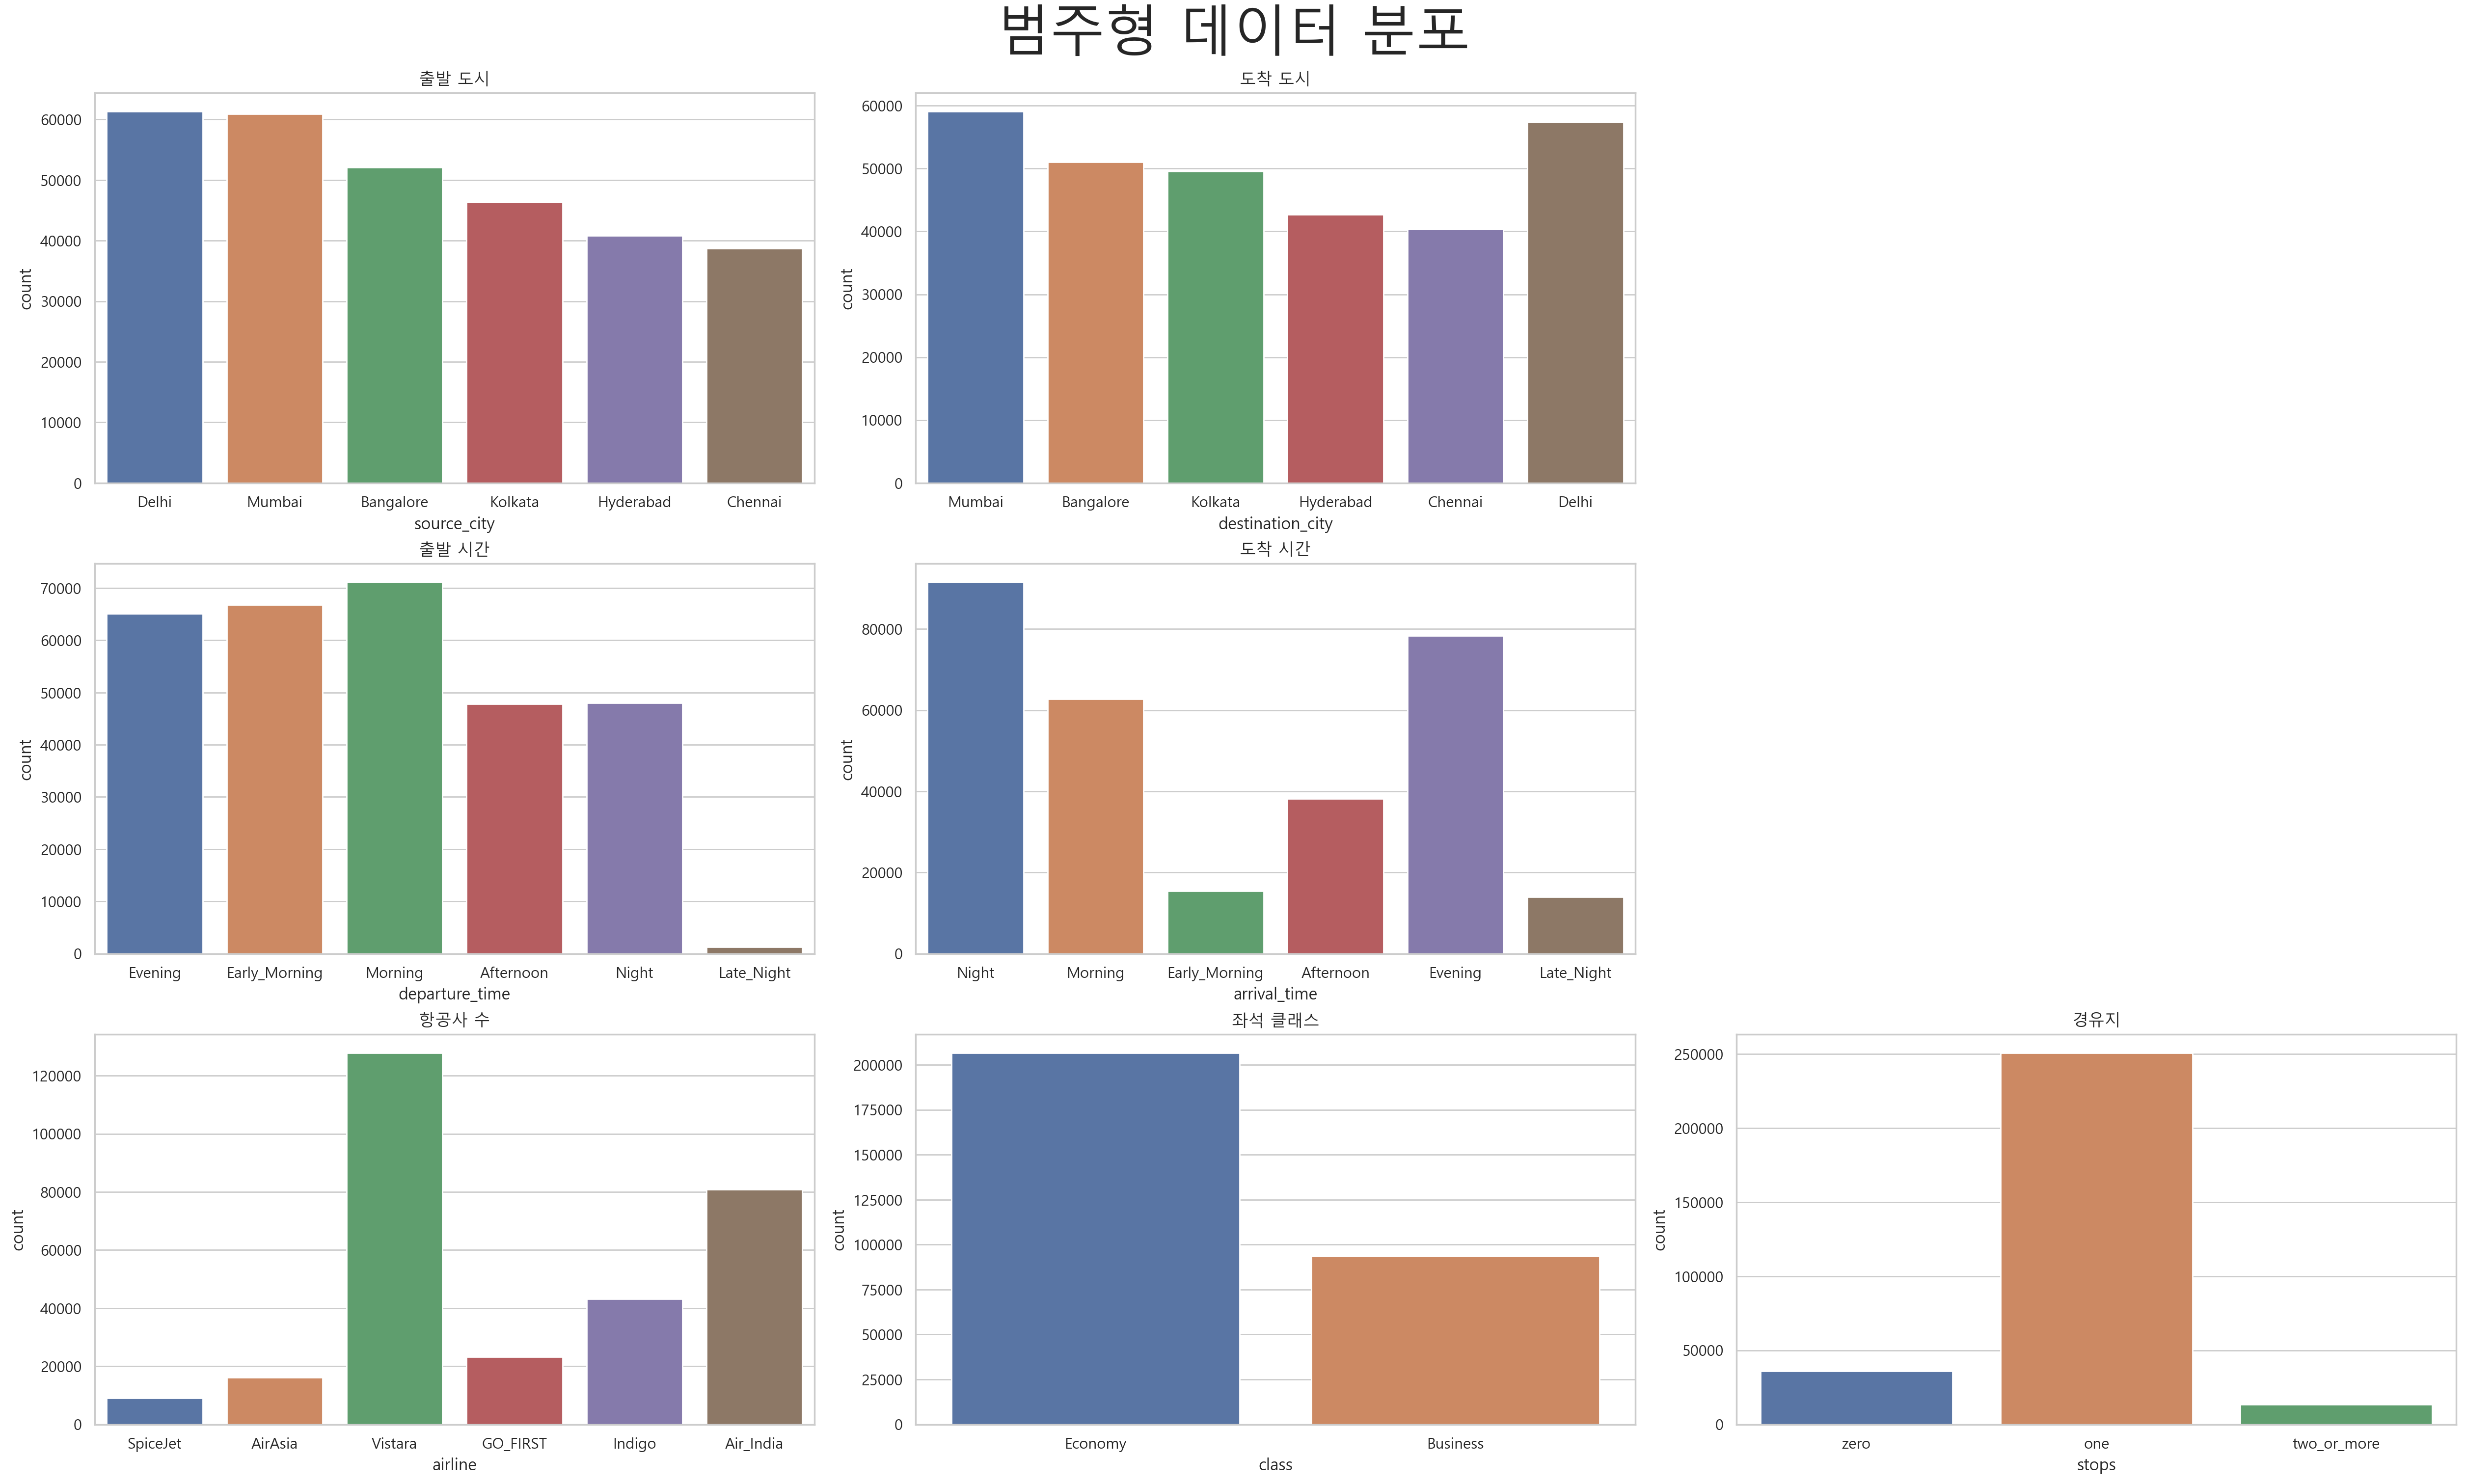

In [12]:
# 범주형 데이터 분포
sns.set_theme(style="whitegrid")
plt.rcParams['font.family']='Malgun Gothic'
fig, axes=plt.subplots(nrows=3,ncols=3,figsize=(25, 15), dpi=200,constrained_layout=True)
fig.suptitle("범주형 데이터 분포",fontsize=40)

sns.countplot(x="airline", data=df,ax=axes[2,0]).set_title("항공사 수")
sns.countplot(x="source_city", data=df,ax=axes[0,0]).set_title("출발 도시")
sns.countplot(x="destination_city", data=df,ax=axes[0,1]).set_title("도착 도시")
sns.countplot(x="departure_time", data=df,ax=axes[1,0]).set_title("출발 시간")
sns.countplot(x="arrival_time", data=df,ax=axes[1,1]).set_title("도착 시간")
sns.countplot(x="class", data=df,ax=axes[2,1]).set_title("좌석 클래스")
sns.countplot(x="stops", data=df,ax=axes[2,2]).set_title("경유지")
axes[0, 2].axis('off')
axes[1, 2].axis('off')

Text(0.5, 1.0, '가격')

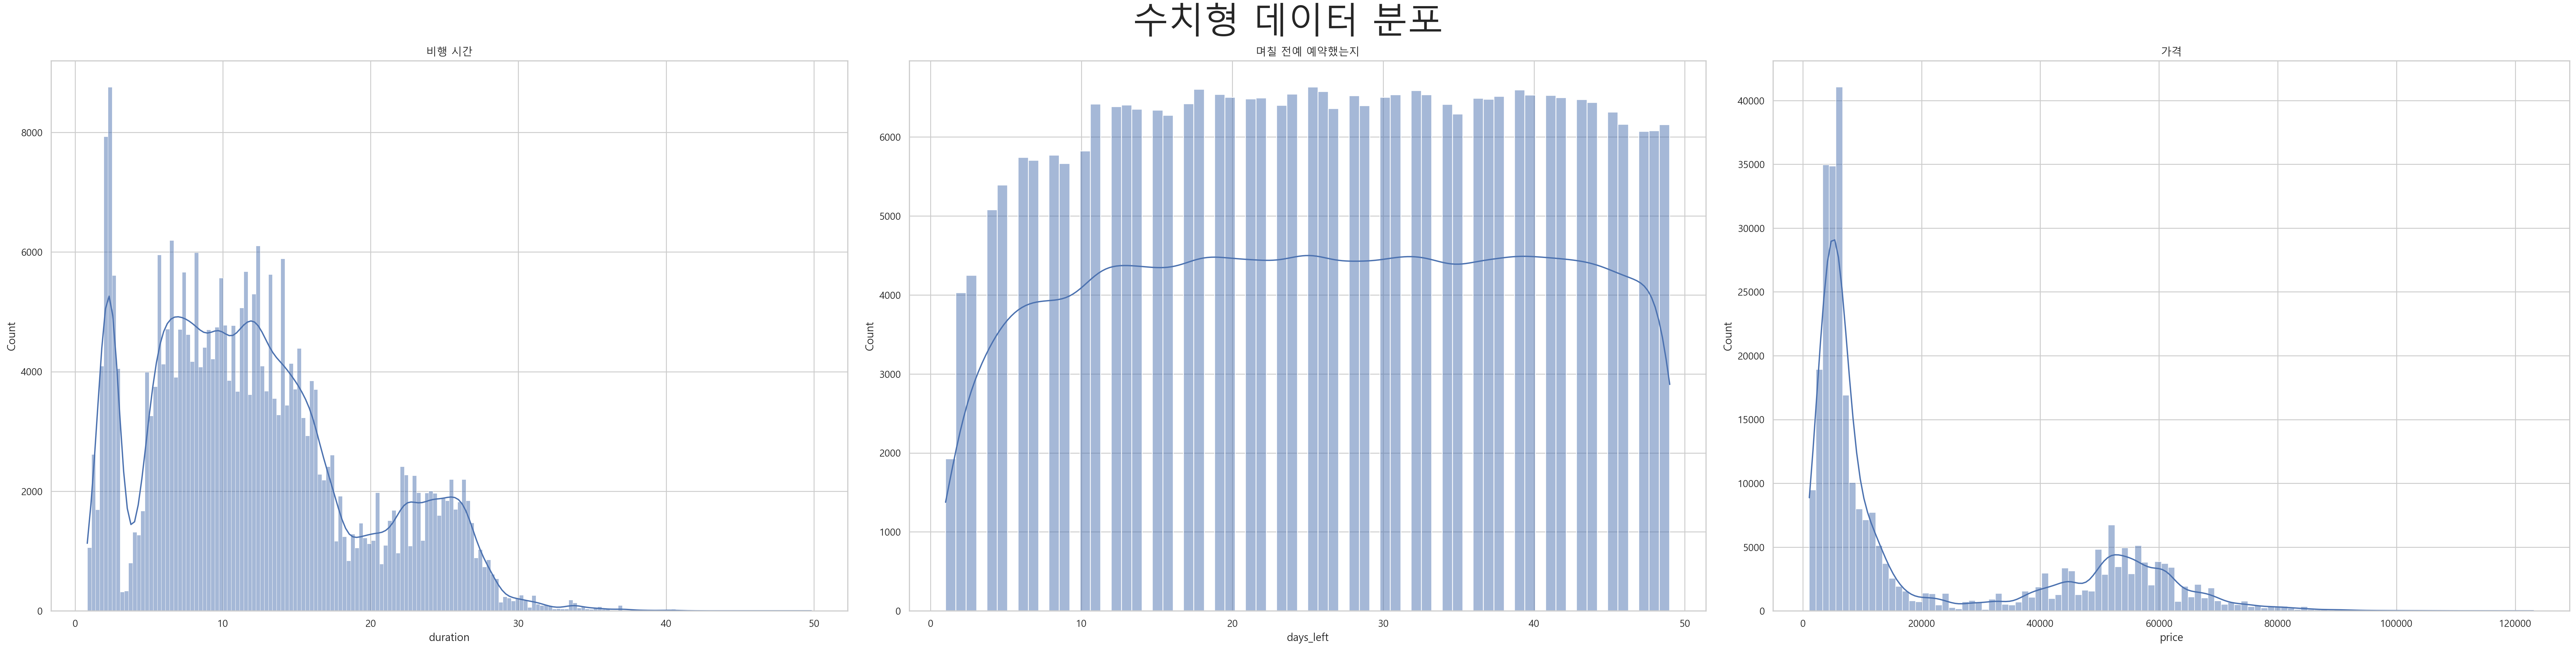

In [13]:
# 수치형 데이터 분포
sns.set_theme(style="whitegrid")
plt.rcParams['font.family']='Malgun Gothic'
fig, axes=plt.subplots(nrows=1,ncols=3,figsize=(40, 10), dpi=200,constrained_layout=True)
fig.suptitle("수치형 데이터 분포",fontsize=40)
sns.histplot(data=df,x="duration",kde=True,ax=axes[0]).set_title("비행 시간")
sns.histplot(data=df,x="days_left",kde=True,ax=axes[1]).set_title("며칠 전예 예약했는지")
sns.histplot(data=df,x="price",kde=True,ax=axes[2]).set_title("가격")

C:\Users\Eunji\miniconda3\envs\Python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Eunji\miniconda3\envs\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


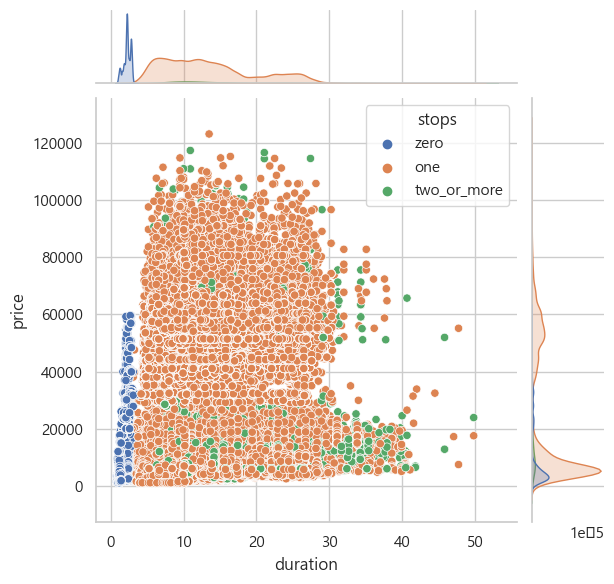

In [14]:
#경유(stops)에 따른 운행시간(duration)의 가격(price)
sns.jointplot(data=df,x="duration",y="price",hue="stops")

<AxesSubplot:xlabel='duration', ylabel='price'>

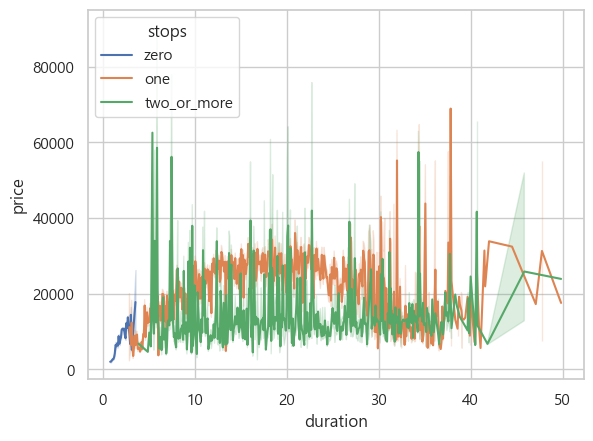

In [15]:
# #경유(stops)에 따른 운행시간(duration)의 가격(price)
sns.lineplot(data=df,x="duration",y="price",hue="stops")

In [16]:
len(df['flight'].unique())

1561

In [17]:
# 항공사와 비행기 그룹으로 비행 수 가져오기
flight_count=df.groupby(['airline','flight'],as_index=False).count()
flight_count.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

<AxesSubplot:xlabel='airline', ylabel='count'>

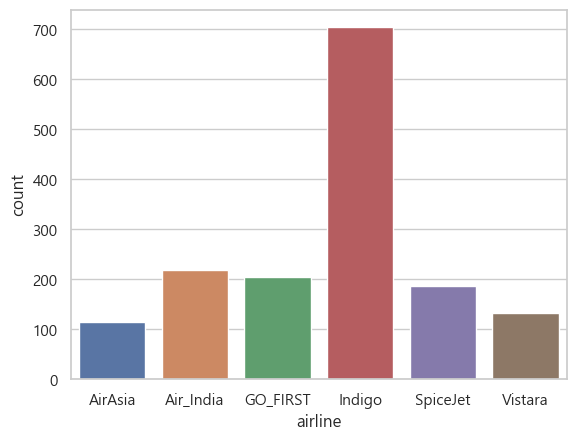

In [18]:
# 가장 인기 있는 항공사(airline)
sns.countplot(x=flight_count.airline)

In [19]:
# 클래스,항공사,경유,출발-예약날짜 차이에 대한 가격
sns.set_theme(style="whitegrid")
plt.rcParams['font.family']='Malgun Gothic'
fig, axes=plt.subplots(nrows=4,ncols=2,figsize=(40, 40), dpi=200,constrained_layout=True)
fig.suptitle("다변량 그래프",fontsize=40)
sns.boxenplot(data=df,x="class",y="price",ax=axes[0,0])
sns.boxenplot(data=df,x="airline",y="price",ax=axes[0,1])
sns.boxenplot(data=df,x="stops",y="price",ax=axes[1,0])
sns.lineplot(data=df,x="days_left",y="price",ax=axes[1,1])
sns.boxenplot(data=df,x="departure_time",y="price",ax=axes[2,0])
sns.boxenplot(data=df,x="arrival_time",y="price",ax=axes[2,1])
sns.boxenplot(data=df,x="source_city",y="price",ax=axes[3,0])
sns.boxenplot(data=df,x="destination_city",y="price",ax=axes[3,1])

<AxesSubplot:xlabel='destination_city', ylabel='price'>

<AxesSubplot:xlabel='source_city', ylabel='count'>

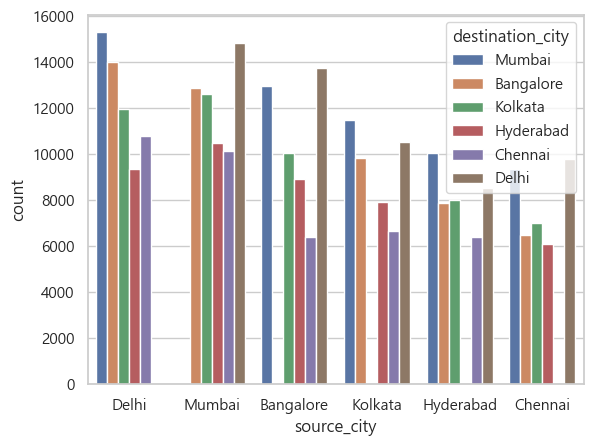

In [20]:
# 출발지(source_city)->목적지(destination_city) 카운트
sns.countplot(data=df,x="source_city",hue="destination_city")

<AxesSubplot:xlabel='source_city', ylabel='price'>

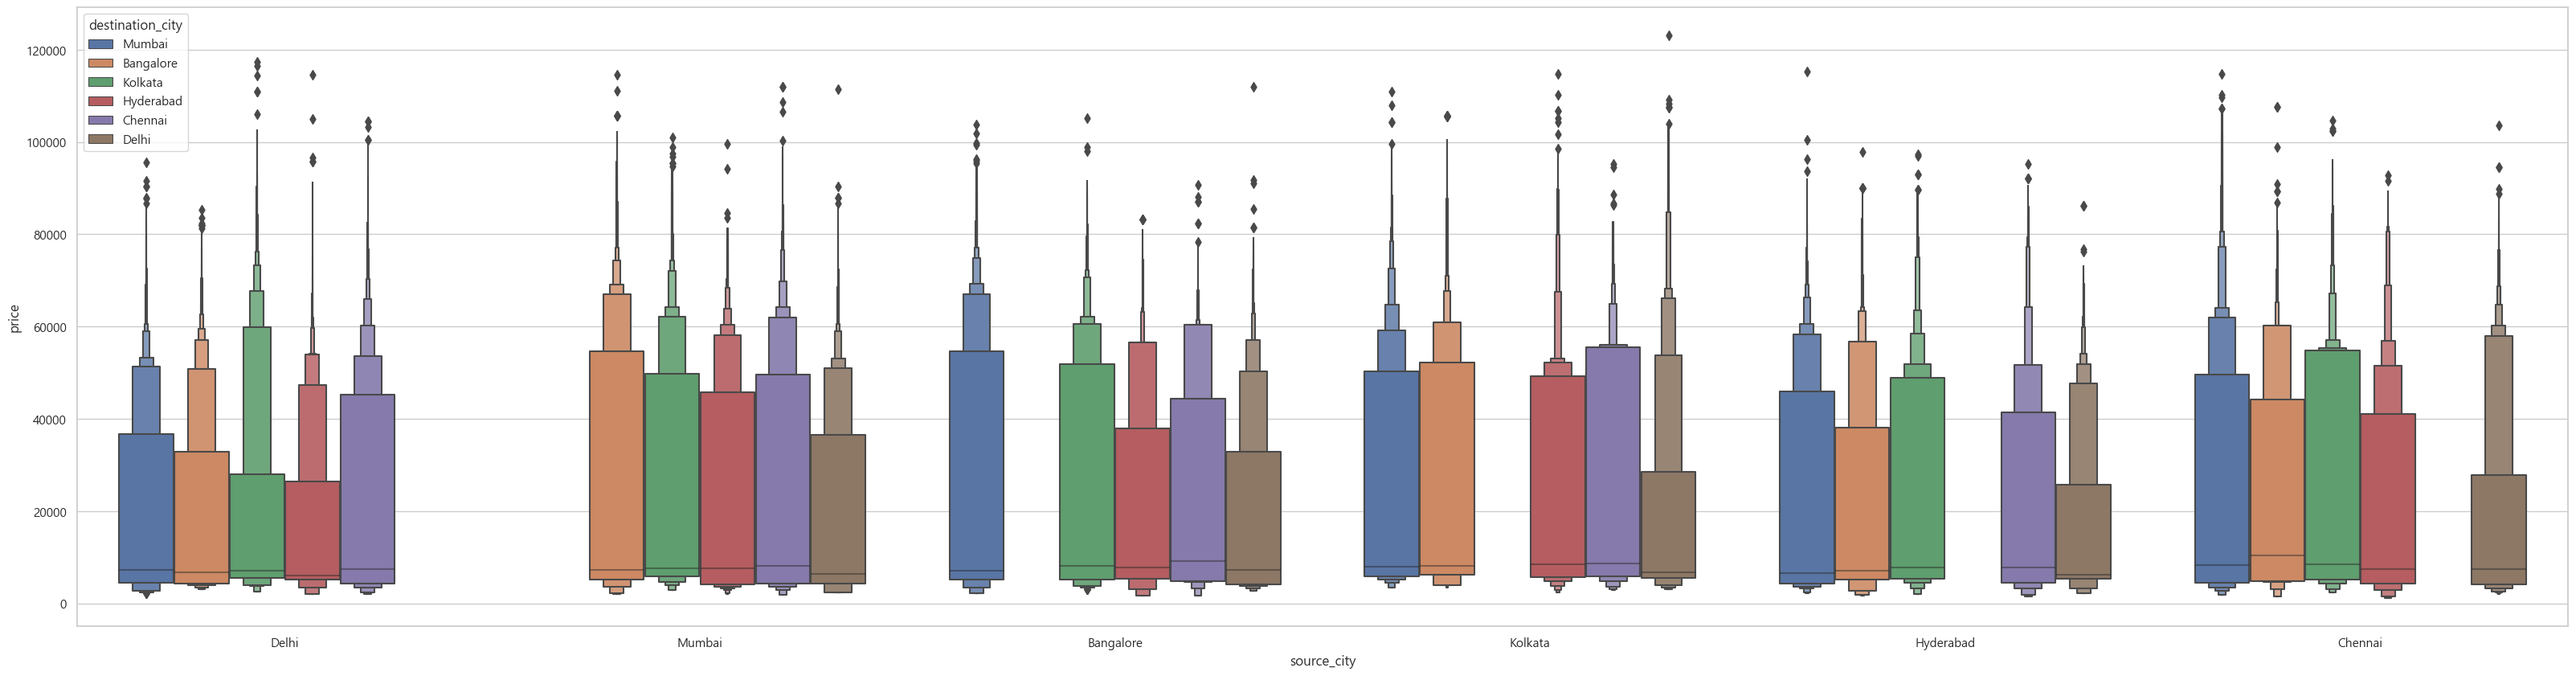

In [21]:
# 출발지(source_city)와 목적지(destination_city)에 따른 가격
plt.figure(figsize=(40,10))
sns.boxenplot(data=df,x="source_city",y="price",hue="destination_city")

<AxesSubplot:xlabel='destination_city', ylabel='source_city'>

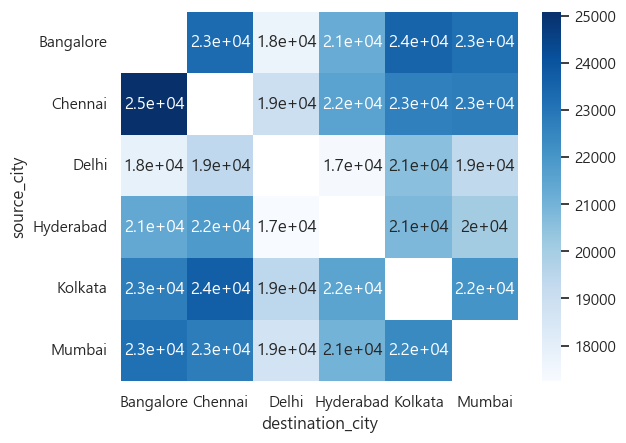

In [22]:
# 출발지(source_city)와 목적지(destination_city)에 따른 가격
city_table=pd.pivot_table(df,index="source_city",columns="destination_city",values="price")
sns.heatmap(city_table,cmap="Blues",annot=True)

<AxesSubplot:xlabel='destination_city', ylabel='price'>

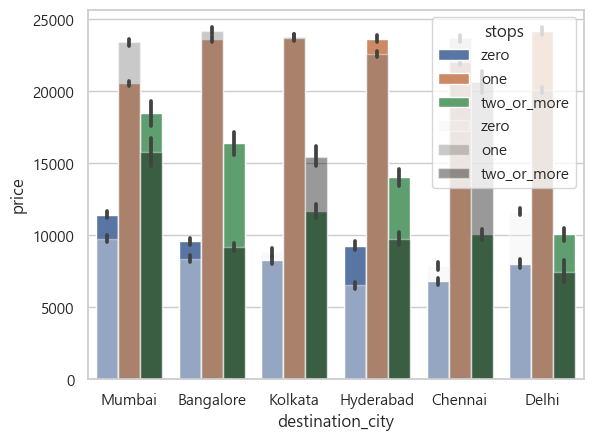

In [23]:
# 출발지(source_city)와 목적지(destination_city), 경유에 따른 가격
sns.barplot(data=df,x="source_city",y="price",hue="stops")
sns.barplot(data=df,x="destination_city",y="price",hue="stops",color='black',alpha=0.4)

<AxesSubplot:xlabel='departure_time', ylabel='count'>

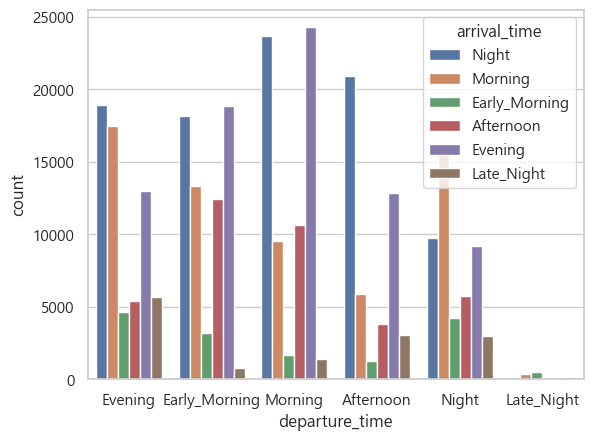

In [24]:
# 출발시간대(departure_time)->도착시간대(arrival_time) 카운트
sns.countplot(data=df,x="departure_time",hue="arrival_time")

<AxesSubplot:xlabel='departure_time', ylabel='price'>

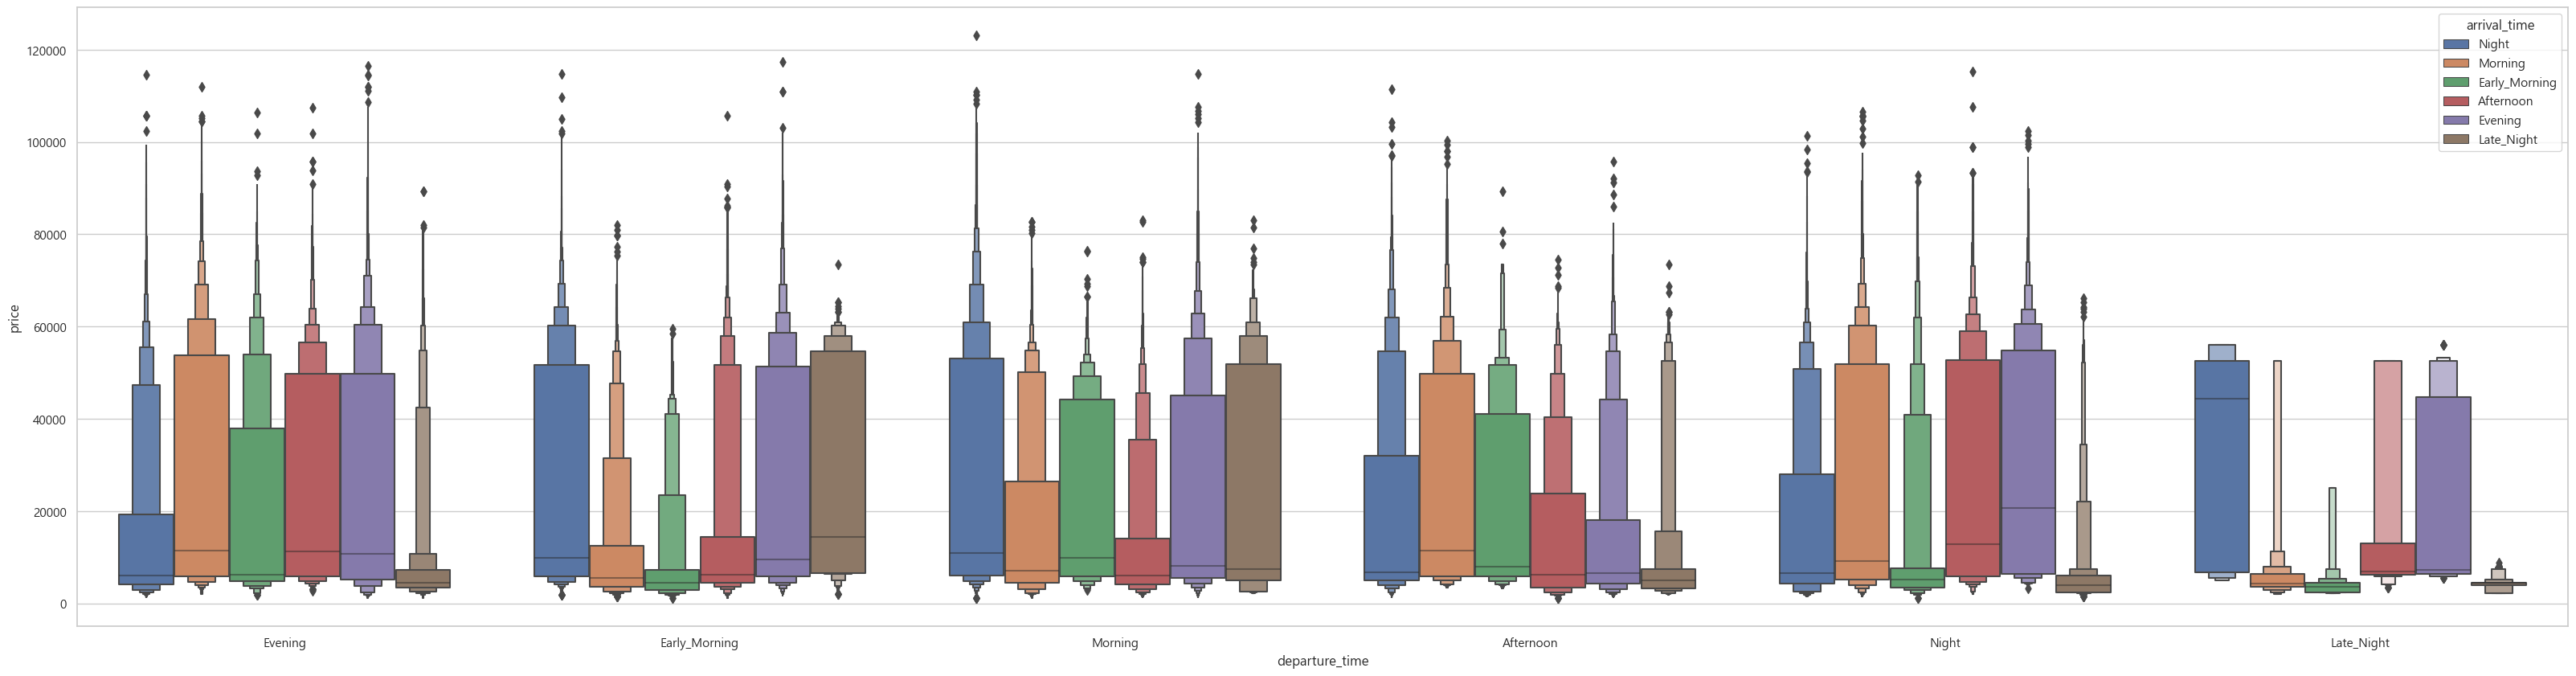

In [25]:
# 출발시간대(departure_time), 도착시간대(arrival_time)에 대한 가격
plt.figure(figsize=(40,10))
sns.boxenplot(data=df,x="departure_time",y="price",hue="arrival_time")

<AxesSubplot:xlabel='arrival_time', ylabel='departure_time'>

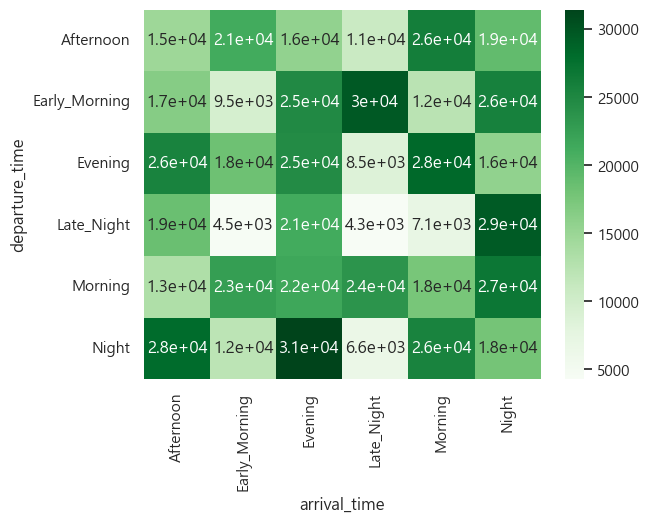

In [26]:
time_price_table=pd.pivot_table(df,index="departure_time",columns="arrival_time",values="price")
sns.heatmap(time_price_table,cmap="Greens",annot=True)

In [27]:
# 도시간 운행 거리
city_time_table=pd.pivot_table(df,index="source_city",columns="destination_city",values="duration")
city_time_table

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,14.480207,9.779956,14.162433,13.099143,10.905072
Chennai,13.952594,NaN,11.149374,13.153985,14.515774,12.374656
Delhi,10.354125,12.433965,NaN,12.518350,12.735966,10.367774
Hyderabad,12.093317,13.293238,10.829817,NaN,13.535322,11.962923
Kolkata,13.792947,14.774182,11.604989,13.853108,NaN,12.991933
Mumbai,11.612023,12.665900,9.818057,13.263310,12.836848,NaN


<AxesSubplot:xlabel='destination_city', ylabel='source_city'>

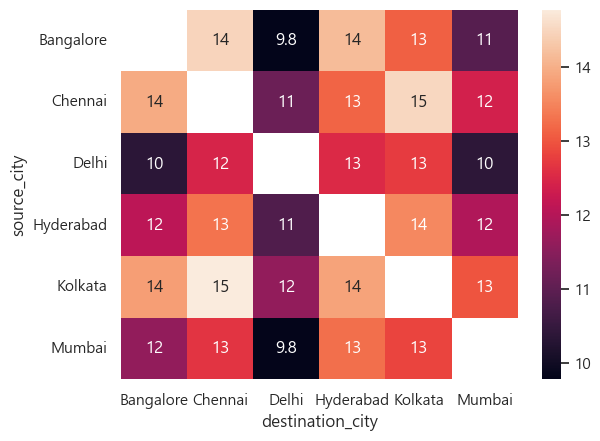

In [28]:
sns.heatmap(city_time_table,annot=True)

# 질문
## 항공사에 따라 가격이 차이가 나는가?
- 가장 비행이 많았던 Indigo항공에 비해 비행이 많이 없었던 Vistara 항공사의 가격이 더 높은 편  

## 표 구매 시기가 가격에 영향을 미치는가?
- 여행가기 직전과 10일 이후에 예약을 하면 가격이 낮고, 여행가기전 2~10일 사이에 예약하면 가격이 높다.

## 운행 시간에 따라 가격이 달라지는가?
- 운행시간이 길다고 해서 가격이 무조건 비싼 건 아님

### 운행시간과 경유
- 운행시간이 같거나 길 경우 경유를 하면 싼 경우가 많음

## 출발지와 목적지가 가격에 영향을 미치는가?
### 출발지와 목적지와 경유
- 출발지와 목적지에 따라서 큰 가격차이 없음
- 출발지와 목적지를 경유해서 가느냐, 직항으로 가느냐에 따라서 가격차이가 있음  
### 출발 시간대와 도착 시간대
- 도착시간이 늦거나, 출발과 도착시간이 늦는 경우에 가격이 쌈
## 이코노미석과 비즈니스석이 가격이 얼마나 다른 가?
- 이코노미석의 상위 25%와 비즈니스석의 하위 25%가 비슷한 가격대일 만큼 큰 차이가 있음


# Preprocessing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [30]:
df1=df.copy()

In [31]:
df1['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [32]:
df1['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [33]:
df1['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [34]:
df1['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

## 레이블 인코딩

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df1['stops']=label_encoder.fit_transform(df['stops'])
df1['class']=label_encoder.fit_transform(df['class'])
df1['airline']=label_encoder.fit_transform(df['airline'])
df1['departure_time']=df1['departure_time'].replace({'Evening':3, 'Early_Morning':4, 'Morning':5, 'Afternoon':1, 'Night':2,
       'Late_Night':0})
df1['arrival_time']=df1['arrival_time'].replace({'Evening':3, 'Early_Morning':4, 'Morning':5, 'Afternoon':1, 'Night':2,
       'Late_Night':0})
df1['destination_city']=df1['destination_city'].replace({'Mumbai':4, 'Bangalore':3, 'Kolkata':2, 'Hyderabad':1, 'Chennai':0, 'Delhi':5})
df1['source_city']=df1['source_city'].replace({'Mumbai':4, 'Bangalore':3, 'Kolkata':2, 'Hyderabad':1, 'Chennai':0, 'Delhi':5})
df1


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,5,3,2,2,4,1,2.17,1,5953
1,4,SG-8157,5,4,2,5,4,1,2.33,1,5953
2,0,I5-764,5,4,2,4,4,1,2.17,1,5956
3,5,UK-995,5,5,2,1,4,1,2.25,1,5955
4,5,UK-963,5,5,2,5,4,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,0,5,0,3,1,0,10.08,49,69265
300149,5,UK-826,0,1,0,2,1,0,10.42,49,77105
300150,5,UK-832,0,4,0,2,1,0,13.83,49,79099
300151,5,UK-828,0,4,0,3,1,0,10.00,49,81585


In [36]:
#pd.set_option('display.max_rows', 10000)
#df1['flight'].value_counts()<200
#val=df1['flight'].value_counts()<200
#few_flight=val[val].index
#few_flight 

# 레이블, 빈도 인코딩

In [65]:
df2=df.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df2['stops']=label_encoder.fit_transform(df['stops'])
df2['class']=label_encoder.fit_transform(df['class'])
df2['airline']=label_encoder.fit_transform(df['airline'])

for col in ['flight','source_city','departure_time','arrival_time','destination_city']:
    freq=df2[col].value_counts()
    df2[col]=df2[col].map(freq)
df2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,133,61343,65102,2,91538,59097,1,2.17,1,5953
1,4,131,61343,66790,2,62735,59097,1,2.33,1,5953
2,0,98,61343,66790,2,15417,59097,1,2.17,1,5956
3,5,1024,61343,71146,2,38139,59097,1,2.25,1,5955
4,5,987,61343,71146,2,62735,59097,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,2468,38700,71146,0,78323,42726,0,10.08,49,69265
300149,5,2335,38700,47794,0,91538,42726,0,10.42,49,77105
300150,5,2404,38700,66790,0,91538,42726,0,13.83,49,79099
300151,5,2440,38700,66790,0,78323,42726,0,10.00,49,81585


# flight 삭제 후 예측

In [37]:
drop_flight=df1.drop(columns='flight')
drop_flight

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,5,3,2,2,4,1,2.17,1,5953
1,4,5,4,2,5,4,1,2.33,1,5953
2,0,5,4,2,4,4,1,2.17,1,5956
3,5,5,5,2,1,4,1,2.25,1,5955
4,5,5,5,2,5,4,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,0,5,0,3,1,0,10.08,49,69265
300149,5,0,1,0,2,1,0,10.42,49,77105
300150,5,0,4,0,2,1,0,13.83,49,79099
300151,5,0,4,0,3,1,0,10.00,49,81585


<AxesSubplot:xlabel='price', ylabel='Count'>

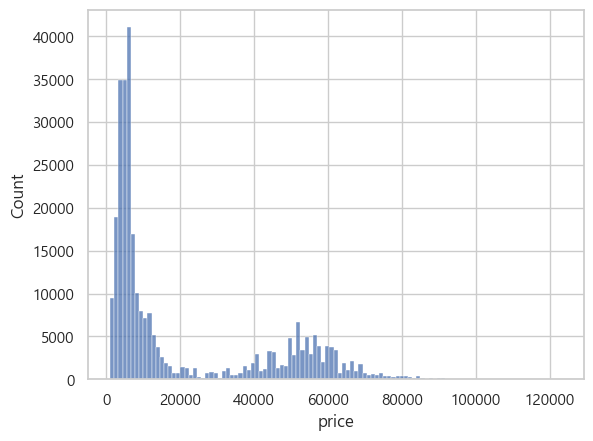

In [38]:
sns.histplot(data=df,x='price')

In [39]:
drop_flight_target=drop_flight['price'].to_numpy()
drop_flight_input=drop_flight[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']].to_numpy()

In [40]:
drop_flight_target

array([ 5953,  5953,  5956, ..., 79099, 81585, 81585], dtype=int64)

In [41]:
drop_flight_input

array([[ 4.  ,  5.  ,  3.  , ...,  1.  ,  2.17,  1.  ],
       [ 4.  ,  5.  ,  4.  , ...,  1.  ,  2.33,  1.  ],
       [ 0.  ,  5.  ,  4.  , ...,  1.  ,  2.17,  1.  ],
       ...,
       [ 5.  ,  0.  ,  4.  , ...,  0.  , 13.83, 49.  ],
       [ 5.  ,  0.  ,  4.  , ...,  0.  , 10.  , 49.  ],
       [ 5.  ,  0.  ,  5.  , ...,  0.  , 10.08, 49.  ]])

In [42]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(drop_flight_input,drop_flight_target,random_state=42, test_size=0.4)

In [75]:
train_input

array([[ 5.  ,  3.  ,  4.  , ...,  1.  , 26.17, 20.  ],
       [ 3.  ,  2.  ,  3.  , ...,  1.  ,  2.5 , 21.  ],
       [ 5.  ,  3.  ,  5.  , ...,  0.  , 24.  , 41.  ],
       ...,
       [ 1.  ,  2.  ,  2.  , ...,  1.  , 13.67, 29.  ],
       [ 2.  ,  2.  ,  1.  , ...,  1.  ,  8.33, 39.  ],
       [ 1.  ,  2.  ,  1.  , ...,  1.  , 20.17, 17.  ]])

<AxesSubplot:ylabel='Count'>

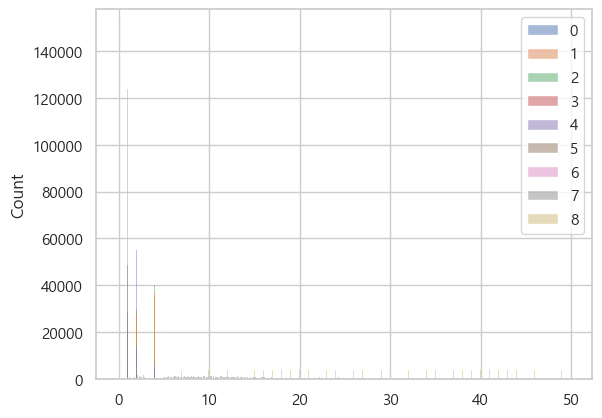

In [43]:
sns.histplot(data=train_input)

## 정규화

In [44]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_input)
train_scaled=scaler.transform(train_input)
test_scaled=scaler.transform(test_input)

<AxesSubplot:ylabel='Count'>

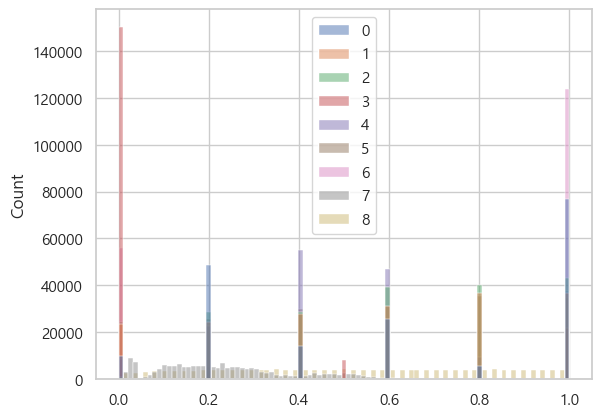

In [45]:
sns.histplot(data=train_scaled)

## 평가지표 -RMSLE
- rmse에 로그 취해서 상대적인 값 평가

In [46]:
#오버플로우 방지용 rmsle 함수
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [47]:
# knn회귀
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(train_scaled,train_target)
pred=knr.predict(test_scaled)

print(knr.score(train_scaled,train_target)) 
print(knr.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.980963860990898
0.9703511050382644
RMSLE:  0.18791358944460812


In [48]:
# 선형회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_scaled,train_target)
pred=lr.predict(test_scaled)

print(lr.score(train_scaled,train_target)) 
print(lr.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9044769352474095
0.9048616285527264
RMSLE:  nan


C:\Users\Eunji\AppData\Local\Temp\ipykernel_18980\3789501151.py:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [49]:
#릿지
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_input,train_target)
pred=ridge.predict(test_input)

print(ridge.score(train_input,train_target)) 
print(ridge.score(test_input,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9044769346636643
0.9048615901035709
RMSLE:  nan


C:\Users\Eunji\AppData\Local\Temp\ipykernel_18980\3789501151.py:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [50]:
# 라쏘 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_input,train_target)
pred=lasso.predict(test_input)

print(ridge.score(train_input,train_target)) 
print(ridge.score(test_input,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9044769346636643
0.9048615901035709
RMSLE:  nan


C:\Users\Eunji\AppData\Local\Temp\ipykernel_18980\3789501151.py:4: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [51]:
#결정트리

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_scaled,train_target)
pred=dt.predict(test_scaled)
print(dt.score(train_scaled,train_target)) 
print(dt.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.99948476120439
0.9748257091965284
RMSLE:  0.17910965947941485


In [52]:
#결정트리 정규화 없이

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_input,train_target)
pred=dt.predict(test_input)
print(dt.score(train_input,train_target)) 
print(dt.score(test_input,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.99948476120439
0.9747586091847232
RMSLE:  0.17899704264596117


In [53]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=42)
rf.fit(train_scaled,train_target)
pred=rf.predict(test_scaled)

print(rf.score(train_scaled,train_target)) 
print(rf.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9975468816142086
0.9846510533984084
RMSLE:  0.14327019109796957


In [54]:
#랜덤 포레스트 정규화없이
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=42)
rf.fit(train_input,train_target)
pred=rf.predict(test_input)

print(rf.score(train_input,train_target)) 
print(rf.score(test_input,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9975518351851478
0.984607534960914
RMSLE:  0.14336106744017565


In [55]:
#엑스트라트리

from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor(random_state=42)
et.fit(train_scaled, train_target)
pred=et.predict(test_scaled)
print(et.score(train_scaled,train_target)) 
print(et.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9994846470815086
0.9824428343843772
RMSLE:  0.1549759838777237


In [56]:
#그래디언트부스팅

from sklearn.ensemble import GradientBoostingRegressor

gb= GradientBoostingRegressor(random_state=42)
gb.fit(train_scaled, train_target)
pred=gb.predict(test_scaled)

print(gb.score(train_scaled,train_target)) 
print(gb.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

0.9517358310874522
0.9517085200791682
RMSLE:  0.2649241641870969


In [57]:
#hist그래디언트부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hb=HistGradientBoostingRegressor(random_state=42)
hb.fit(train_scaled, train_target)
pred=hb.predict(test_scaled)

print(hb.score(train_scaled,train_target)) 
print(hb.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

C:\Users\Eunji\miniconda3\envs\Python\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9707801971705181
0.9700097855783129
RMSLE:  0.2356228727509376


In [58]:
#xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor(tree_method='hist',random_state=42)
xgb.fit(train_scaled, train_target)
pred=xgb.predict(test_scaled)

print(xgb.score(train_scaled,train_target)) 
print(xgb.score(test_scaled,test_target))
print("RMSLE: ", rmsle(test_target,pred) )

C:\Users\Eunji\miniconda3\envs\Python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


0.9776761656256017
0.9758814792096561
RMSLE:  0.20499533183026344


# 빈도 인코딩 예측

In [76]:
freq_target=df2['price'].to_numpy()
freq_input=df2[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']].to_numpy()

In [77]:
from sklearn.model_selection import train_test_split
trainf_input, testf_input, trainf_target, testf_target=train_test_split(freq_input,freq_target,random_state=42, test_size=0.4)

In [78]:
trainf_input

array([[5.0000e+00, 5.2061e+04, 6.6790e+04, ..., 1.0000e+00, 2.6170e+01,
        2.0000e+01],
       [3.0000e+00, 4.6347e+04, 6.5102e+04, ..., 1.0000e+00, 2.5000e+00,
        2.1000e+01],
       [5.0000e+00, 5.2061e+04, 7.1146e+04, ..., 0.0000e+00, 2.4000e+01,
        4.1000e+01],
       ...,
       [1.0000e+00, 4.6347e+04, 4.8015e+04, ..., 1.0000e+00, 1.3670e+01,
        2.9000e+01],
       [2.0000e+00, 4.6347e+04, 4.7794e+04, ..., 1.0000e+00, 8.3300e+00,
        3.9000e+01],
       [1.0000e+00, 4.6347e+04, 4.7794e+04, ..., 1.0000e+00, 2.0170e+01,
        1.7000e+01]])

In [82]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(trainf_input)
trainf_scaled=scaler.transform(trainf_input)
testf_scaled=scaler.transform(testf_input)

In [79]:
#랜덤 포레스트 정규화없이
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=42)
rf.fit(trainf_input,trainf_target)
pred=rf.predict(testf_input)

print(rf.score(trainf_input,trainf_target)) 
print(rf.score(testf_input,testf_target))
print("RMSLE: ", rmsle(testf_target,pred) )

0.9975530107974109
0.9845306031940627
RMSLE:  0.1429793035297283


In [83]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=42)
rf.fit(trainf_scaled,trainf_target)
pred=rf.predict(testf_scaled)

print(rf.score(trainf_scaled,trainf_target)) 
print(rf.score(testf_scaled,testf_target))
print("RMSLE: ", rmsle(testf_target,pred) )

0.9975499547078299
0.9845689668860871
RMSLE:  0.14287706394943334


In [84]:
#그래디언트부스팅

from sklearn.ensemble import GradientBoostingRegressor

gb= GradientBoostingRegressor(random_state=42)
gb.fit(trainf_scaled, trainf_target)
pred=gb.predict(testf_scaled)

print(gb.score(trainf_scaled,trainf_target)) 
print(gb.score(testf_scaled,testf_target))
print("RMSLE: ", rmsle(testf_target,pred) )

0.9514158121868115
0.9512754402103617
RMSLE:  0.265363588398303


In [86]:
#그래디언트부스팅

from sklearn.ensemble import GradientBoostingRegressor

gb= GradientBoostingRegressor(random_state=42)
gb.fit(trainf_input, trainf_target)
pred=gb.predict(testf_input)

print(gb.score(trainf_input,trainf_target)) 
print(gb.score(testf_input,testf_target))
print("RMSLE: ", rmsle(testf_target,pred) )

0.9514158121868115
0.9512754402103617
RMSLE:  0.265363588398303
